**Video Game Sales Analysis**
--



With the dataset given in Kaggle I developed a couple of questions that I hope to answer from analyzing using different visuals. The core question I am looking at is simply what genres are popular based on different time periods? Are people shifting what games they like based on what time period they are in? I also want to have a look and see what publishers are having the most influence in the market and the shift in publisher power over the different time periods. Time periods will be displayed by decades.

**Table of Contents**
--
1. **[Loading in the Data](#1.-Loading-in-the-Data)**
2. **[Overview of the Data](#2.-Overview-of-the-Data)**
3. **[Cleaning the Data](#3.-Cleaning-the-Data)**
4. **[Making Subsets of the Data](#4.-Making-Subsets-of-the-Data)**
5. **[Visualizing the Data](#5.-Visualizing-the-Data)**
6. **[Publisher Influence Information](#6.-Publisher-Influence-Information)**
7. **[Conclusion](#7.-Conclusion)**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


**1. Loading in the Data**
--

In [2]:
import matplotlib.pyplot as plt
filename = "/kaggle/input/videogamesales/vgsales.csv"
df = pd.read_csv(filename) #Create dataframe

**2. Overview of the Data**
--

In [3]:
df.head() #Show first 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


As shown above we have 11 columns with the data already being sorted out by highest selling games. The columns we are focused on are Year, Genre, Publisher and Global_Sales. The other columns that might come into play later are NA_Sales(North American Sales), EU_Sales(Europe Sales), JP_Sales(Japan Sales), Other_Sales(Sales from regions not associated with the previously mentioned columns) and a few other columns that are self-explanatory. All of the sales numbers shown above are in millions.

In [4]:
#Take a look at the non-null count of all the variables
df.info()
df.Genre.unique() #Show all the different genres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [5]:
#Take a look at each of the variables in more depth
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Text(0.5, 1.0, 'Histogram of Global Sales Over Time')

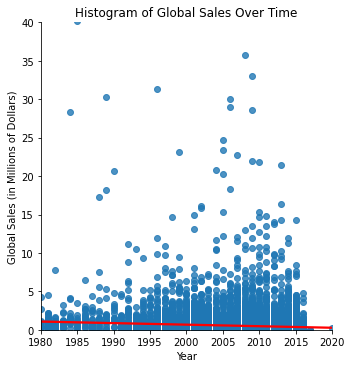

In [6]:
#Histograms of Variables
import seaborn as sns
from matplotlib.pyplot import plot
sns.lmplot(x='Year', y='Global_Sales', data=df, line_kws={'color': 'red'})
plt.ylim(0,40)
plt.xlabel("Year")
plt.ylabel("Global Sales (in Millions of Dollars)")
plt.title("Histogram of Global Sales Over Time")

By the trend line in the graph above it can be seen that over time global sales for video games are going down.

**3. Cleaning the Data**
--

In this section we will want to go through and make sure that we have cleaned up the data so that we are having unbiased appropriate visualizations. To do this we will go through each of the columns and make sure they are properly set-up. From the overview section we know that this dataset has 16,598 entries and we are able to use that information to find which columns have potential missing values. Let's start by bring up the columns again.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Lucky for us there looks to be only two columns that have some missing values and these are the Year column and the Publisher column. We will be using both of these columns for visualizations so lets go ahead and deal with the missing values.

In [8]:
df.isna().sum() #Number of Missing Values for Each Column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.dropna(inplace=True)
print(df.shape)
df.isna().sum()


(16291, 11)


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

From above it is confirmed that the dataset has now been brought down to 11 columns and only 16,291 rows which means we dropped all of the rows where there was missing data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Now that we have the missing data taken care of I want to make sure that all of the columns I am using are in the correct data type. From above it looks like we should change the Year column to an object, but all the other columns are set-up like we want.

**4. Making Subsets of the Data**
--

Now we are all set to start making new datasets for each of the decades.

In [11]:
decade1 = df[(df.Year >= 1980) & (df.Year <= 1989)]
print(decade1.shape)
decade2 = df[(df.Year >= 1990) & (df.Year <= 1999)]
print(decade2.shape)
decade3 = df[(df.Year >= 2000) & (df.Year <= 2009)]
print(decade3.shape)
decade4 = df[(df.Year >= 2010) & (df.Year <= 2019)]
print(decade4.shape)

(205, 11)
(1769, 11)
(9183, 11)
(5133, 11)


From above it can be seen that one of the problems that will be faced with this particular question is how unequal the data is for each decade. The final two decade datasets are 4000 observations away from each other and those are the closest datasets we have in terms of number of rows. This is a problem that has no real solution, and instead of having this be a stopping point for answering my question, I will just recognize this difference and take an analysis of the information that I have.

**5. Visualizing the Data**
--

The big question we are wanting to answer is what type of genre is the most popular for each decade. I realize now that global sales do not necessarily indicate what genres are the most popular for each decade. The data I am using is not going to be able to with full confidence give me an answer because if I really wanted to find out what genre was the most popular I would need to use a column for units sold instead of global sales. This is an unfortunate finding in the project, but to keep going on the project and "complete" it I will be changing my main question to what genres have the highest global sales per decade, and is their a trend in where the global sales are?

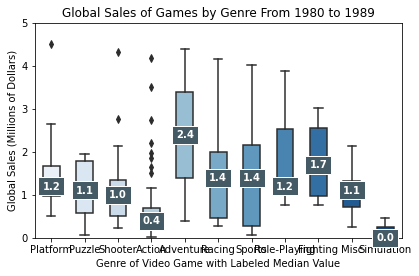

In [12]:
import seaborn as sns
box_plot = sns.boxplot(x='Genre', y='Global_Sales', data=decade1, width=.5, palette='Blues')
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,11.27)})
plt.ylim(0,5)
plt.xlabel("Genre of Video Game with Labeled Median Value")
plt.ylabel("Global Sales (Millions of Dollars)")
plt.title("Global Sales of Games by Genre From 1980 to 1989")

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

From the boxplot for the years between 1980 and 1989 there are some distinct conclusions that can be drawn. The genre 'Adventure' is by far the genre with the highest global sales with the median being 2.4 million. Other genres that are noticeable are 'Fighting', 'Racing' and 'Sports'. When looking at genres that are not doing very well it can be seen that 'Simulation' is very low and 'Action' as well. With 'Action' it is interesting though because there are a lot of outliers in the category that do very well. 

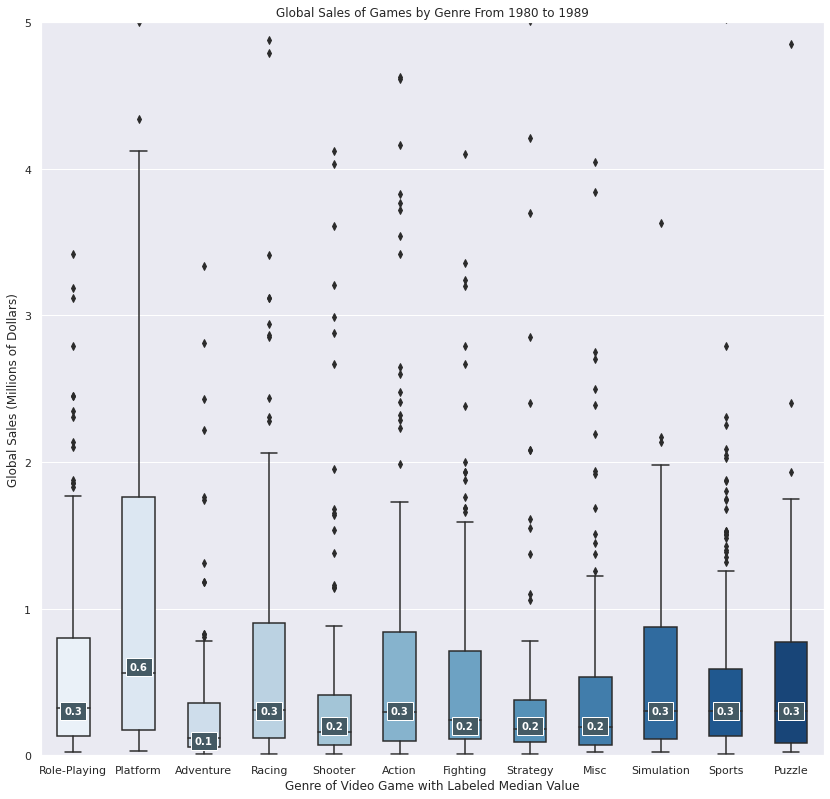

In [13]:
box_plot = sns.boxplot(x='Genre', y='Global_Sales', data=decade2, width=.5, palette='Blues')
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,11.28)})
plt.ylim(0,5)
plt.xlabel("Genre of Video Game with Labeled Median Value")
plt.ylabel("Global Sales (Millions of Dollars)")
plt.title("Global Sales of Games by Genre From 1980 to 1989")

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

The last 3 boxplots are going to look a little different than the first boxplot because of the difference in observations. The noticeable visuals that go along with more observations are that the medians are going to be a lot closer together and there are going to be a lot more outliers. With that being said all that we are looking to answer is what categories are the most popular by decade. In the 90's there looks to be a major decrease in sales for the 'Adventure' genre in comparison to the 80's. It can also be seen that 'Racing' and 'Sports' are again consistently towards the top half of the genres while having a good amount of outliers. The other noticeable categories are 'Shooter' and 'Fighting' games are in the lower half of the genres while 'Platform' became the leading genre in global sales in the 90's. 

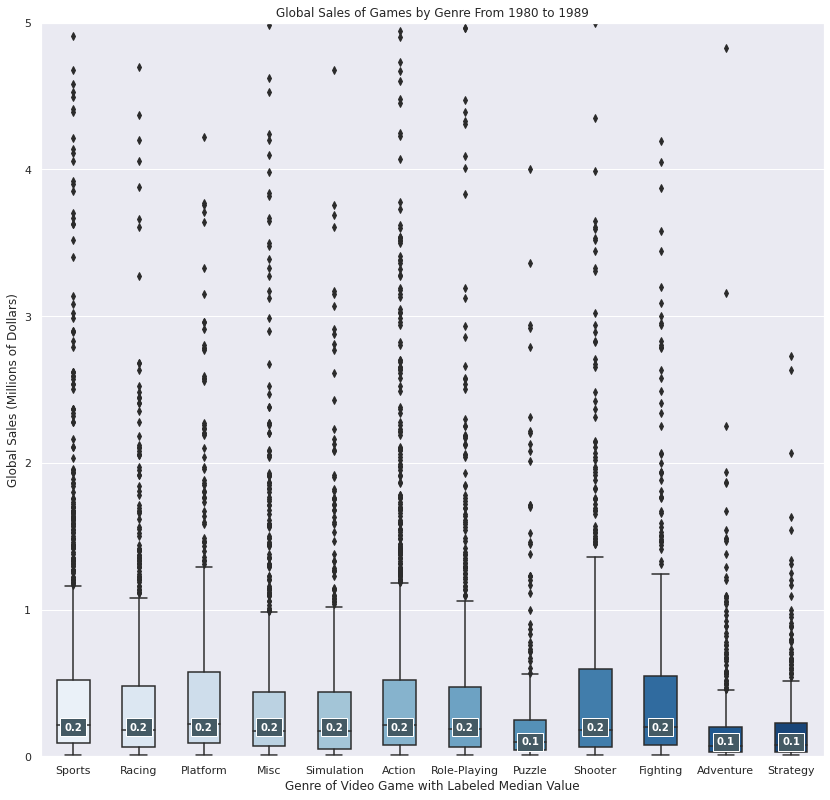

In [14]:
box_plot = sns.boxplot(x='Genre', y='Global_Sales', data=decade3, width=.5, palette='Blues')
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,11.28)})
plt.ylim(0,5)
plt.xlabel("Genre of Video Game with Labeled Median Value")
plt.ylabel("Global Sales (Millions of Dollars)")
plt.title("Global Sales of Games by Genre From 1980 to 1989")

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

The 2000s boxplot is a very interesting one to analyze because of how similar all of these medians are, and because of that we need to look at other parts of the boxplots. The next part of the boxplots that give us answers are what the upper quartile looks like for each genre. As shown above 'Shooter' and 'Fighting' games have definitely made an upwards trend in global sales. 'Adventure' is still down at the bottom of the genres. 'Sports', 'Racing' and 'Platform' are consistently high up as well.

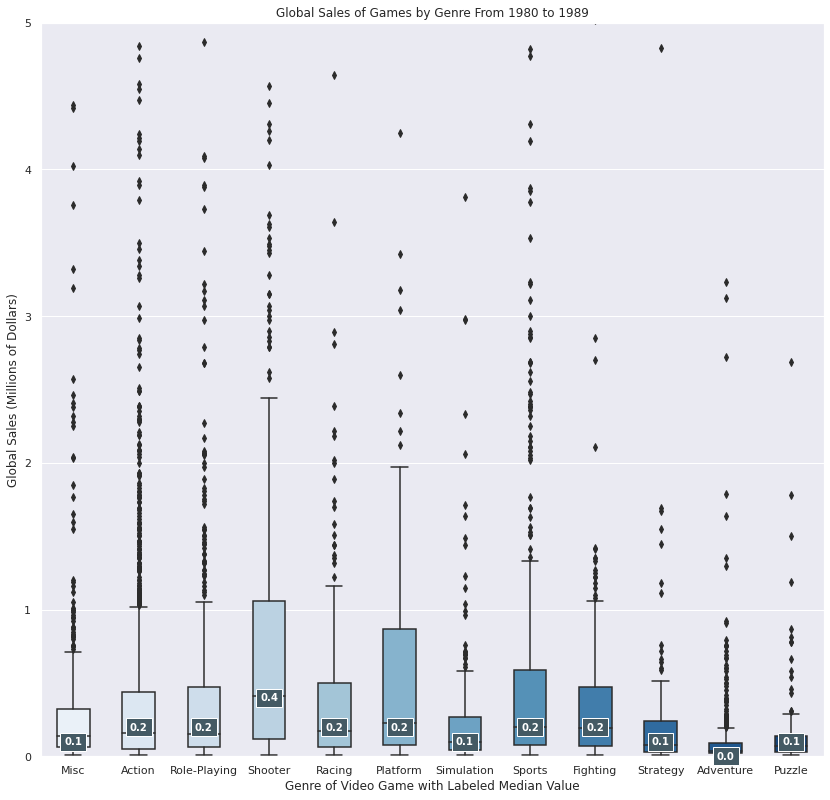

In [15]:
box_plot = sns.boxplot(x='Genre', y='Global_Sales', data=decade4, width=.5, palette='Blues')
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,11.28)})
plt.ylim(0,5)
plt.xlabel("Genre of Video Game with Labeled Median Value")
plt.ylabel("Global Sales (Millions of Dollars)")
plt.title("Global Sales of Games by Genre From 1980 to 1989")

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

The last boxplot is looking at the 2010's and interesting enough even with all of the observations we have there are some clear distinctions between categories. 'Adventure' has now cemented itself at the bottom after 3 decades of consistently pulling in low global sales, and now there is definitely a trend with the genre 'Shooter' as it has spiked up as the clear leader in global sales. 'Racing' has trended a little farther down in the pack in this decade along with 'Fighting' and 'Sports' and 'Platform' have stayed consistently at the top.  

**6. Publisher Influence Information**
--

Text(0.5, 1.0, 'Top Publishers From 1980 to 1989')

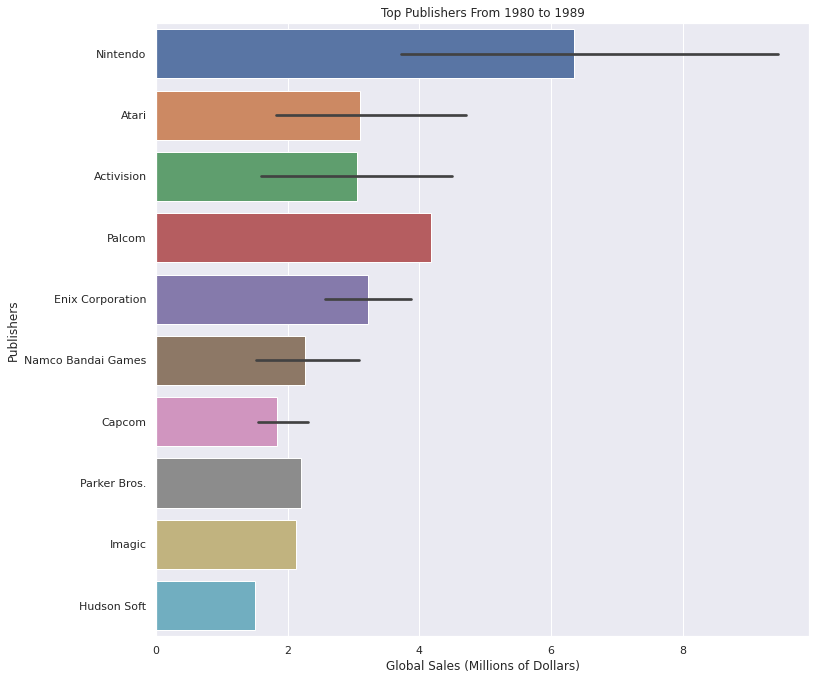

In [16]:
d1pub = decade1[(decade1.Global_Sales >= 1.5)] #Split data up by publishers with global sales above 1.0 global sales
sns.barplot(x='Global_Sales', y='Publisher', data=d1pub)
plt.xlabel("Global Sales (Millions of Dollars)")
plt.ylabel("Publishers")
plt.title("Top Publishers From 1980 to 1989")

Looking at the barplot there are very few publishers competing for the top spot in selling games in the 80's. Nintendo is by far the most popular publisher in the 80's, but publishers like Atari, Activision, Palcom and Enix are also very popular.

Text(0.5, 1.0, 'Top Publishers From 1990 to 1999')

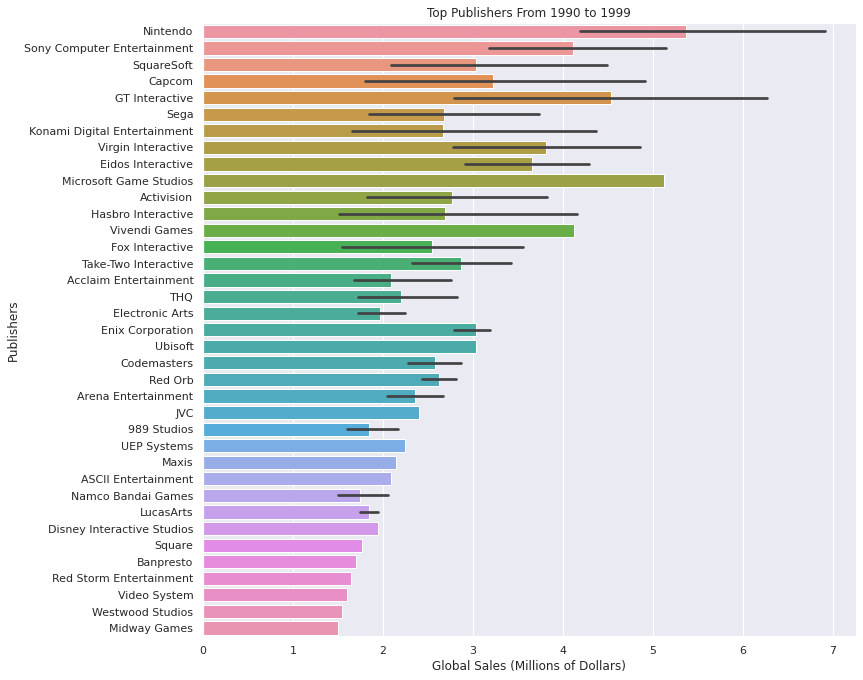

In [17]:
d2pub = decade2[(decade2.Global_Sales >= 1.5)]
sns.barplot(x='Global_Sales', y='Publisher', data=d2pub)
plt.xlabel("Global Sales (Millions of Dollars)")
plt.ylabel("Publishers")
plt.title("Top Publishers From 1990 to 1999")

The 90's prove to be interesting because a lot of the top 80's publishers have fallen off and now publishers like Microsoft Studios, Sony, Vivendi Games, GT Interactive have all gotten closer to Nintendo who has again cemented themselves as the most popular publisher.

Text(0.5, 1.0, 'Top Publishers From 2000 to 2009')

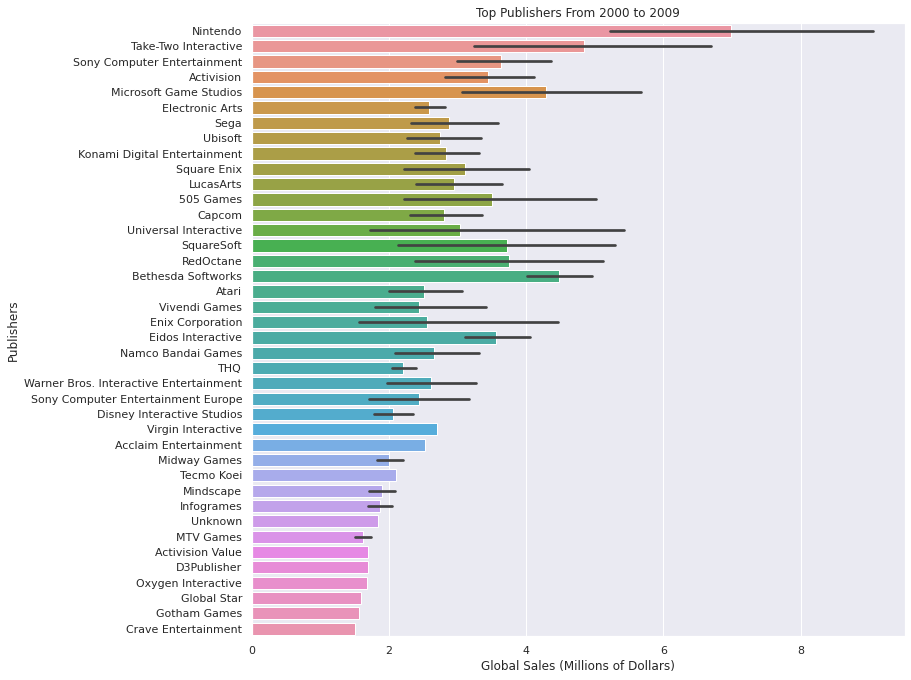

In [18]:
d3pub = decade3[(decade3.Global_Sales >= 1.5)]
sns.barplot(x='Global_Sales', y='Publisher', data=d3pub)
plt.xlabel("Global Sales (Millions of Dollars)")
plt.ylabel("Publishers")
plt.title("Top Publishers From 2000 to 2009")

The 2000s really show how dominate of a publisher Nintendo has been in the video game market. Publishers like Microsoft Game Studios and Sony Computer Entertainment have kept towards the top. It looks like Activision was able to make come back from a bad decade in the 90's and put themselves as a highly popular publisher. New publishers like Take-Two Interactive and Bethesda Softworks have also worked their way into the top of the charts. One interesting part of this is that Sony has two publishers on this graph, and if we are looking at companies that have power in the video game market, it looks like Sony would be competing with Nintendo at the top.

Text(0.5, 1.0, 'Top Publishers From 2010 to 2016')

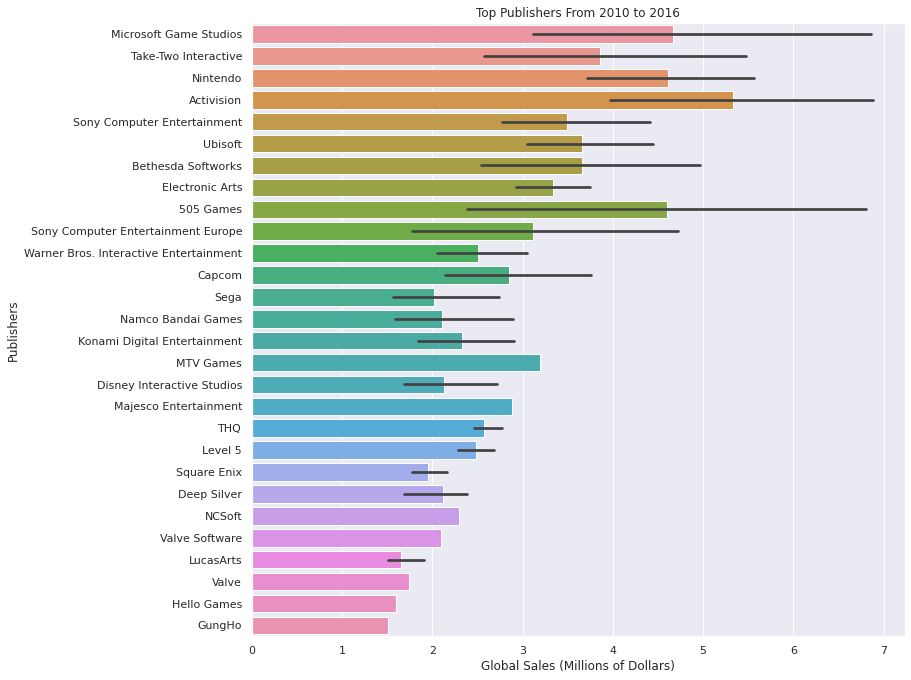

In [19]:
d4pub = decade4[(decade4.Global_Sales >= 1.5)]
sns.barplot(x='Global_Sales', y='Publisher', data=d4pub)
plt.xlabel("Global Sales (Millions of Dollars)")
plt.ylabel("Publishers")
plt.title("Top Publishers From 2010 to 2016")

After three decades of Nintendo rule there are new leaders in the 2010s. Nintendo are still going strong in terms of global sales, but Activision, Microsoft Studios and 505 Games have made a big push. The really impressive part looking at this barplot is that Activision was one of the top publishers in the 80s then fell off in the 90s and found a way to build themselves up to presently the most popular publisher. Capcom has constantly over these four decades stayed towards the top as well which is impressive. Again the data is a little interesting because Sony has two publishers in the top which might not completely reflect how well they are doing as a whole.

**7. Conclusion**
--
Now wrapping up the project and making our final analysis we see that there are some interesting trends going on with this data. There seems to be a shift in genres where intensity is more wanted in games. It started out as sports, platform, and adventure games being the highest selling genres, but evolved into action, fighting, and above all else currently shooter games. Genres like sports and platform have consistently been high selling and now adventure and puzzle games are the lowest selling genres at the moment.
    
The other question we were looking at answering was about which publishers have had the most influence over the video game market. When just thinking about the word influence over these four decades the obvious conclusion is Nintendo. They have been a dominate force in the video game market since the 80s and have consistently stayed there too present day. Publishers like Activision, Microsoft Studios, Sony Entertainment and 505 Games have also showed that they can consistently pull in high global sales as well.

The last thing I want to mention is the unfortunate problems that were ran into during this project. The first being that there were just big of difference in observations between each decade. The second is that global sales do not necessarily answer the above question of popularity. I am sure they do a good job at being very similar to what popularity would be, but global sales is not necessarily the best indicator of popularity. If we had units sold information on each game then that would be the perfect variable to insert for this question. If I were doing this project again I would definitely pay more attention to what is in each variable before I make a big question too answer, and I would also think about taking some random samples from each decade (about 150 samples from each) and then look at the trends. I feel that some of the information might turn out different if that is done. The tricky part is that the decades are so spread out in terms of observations that 150 samples might not accurately represent the 2000s which had 9000 observations. Nevertheless, that is food for thought for my future self looking at this project.
    